In [20]:
import pandas as pd
import matplotlib.pyplot as plt
#3.10.7

In [21]:
full_file = pd.read_csv("albumlist.csv", encoding='latin-1')
full_file.style.hide_index()
print(full_file.to_string(index=False))


 Number  Year                                                                 Album                                                   Artist                                                 Genre                                                                                             Subgenre
      1  1967                                 Sgt. Pepper's Lonely Hearts Club Band                                              The Beatles                                                  Rock                                                                        Rock & Roll, Psychedelic Rock
      2  1966                                                            Pet Sounds                                           The Beach Boys                                                  Rock                                                                           Pop Rock, Psychedelic Rock
      3  1966                                                              Revolver                             

C:\Users\Funky\AppData\Local\Temp\ipykernel_8364\3486662640.py:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  full_file.style.hide_index()


In [31]:
full_file.columns

Index(['Number', 'Year', 'Album', 'Artist', 'Genre', 'Subgenre'], dtype='object')

In [23]:
grouped_by_Genre= full_file.groupby(["Artist"]) .count()
grouped_by_Genre

,Number,Year,Album,Genre,Subgenre
Artist,,,,,
A Tribe Called Quest,1,1,1,1,1
ABBA,1,1,1,1,1
AC/DC,2,2,2,2,2
Aerosmith,2,2,2,2,2
Al Green,3,3,3,3,3
...,...,...,...,...,...
Willie Nelson,2,2,2,2,2
Wire,1,1,1,1,1
Wu Tang Clan,1,1,1,1,1


In [25]:
filtered_file = full_file.drop(columns=["Subgenre"])
filtered_file.head()

,Number,Year,Album,Artist,Genre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock
1,2,1966,Pet Sounds,The Beach Boys,Rock
2,3,1966,Revolver,The Beatles,Rock
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock
4,5,1965,Rubber Soul,The Beatles,Rock


In [26]:
print(len(filtered_file))


500


In [27]:
top_artist = filtered_file.groupby('Artist')['Number'].count().nlargest(5)
top_artist.head()



Artist
Bob Dylan             10
The Beatles           10
The Rolling Stones    10
Bruce Springsteen      8
The Who                7
Name: Number, dtype: int64

Used Data to show the 6 years, that only had 1 top album. Most years selected they had multiple albums that year. This shows that the selectors of this list mostly thought that some years were just a great year for music.

In [28]:
bad_genre = filtered_file.groupby('Year')['Number'].count().nsmallest(6)
print(bad_genre)

Year
1955    1
1958    1
1961    1
2008    1
2010    1
2011    1
Name: Number, dtype: int64


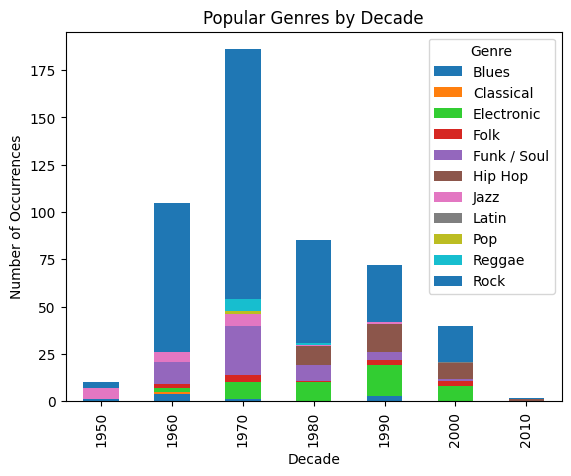

In [47]:
decade_genre_counts = filtered_file.groupby([filtered_file['Year'] // 10 * 10, 'Genre']).size().reset_index(name='Counts')
decade_genre_counts_pivot = decade_genre_counts.pivot(index='Year', columns='Genre', values='Counts')


colors = ['#1f77b4', '#ff7f0e', '#32cd32', '#d62722', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']



ax = decade_genre_counts_pivot.plot(kind='bar', stacked=True, color=colors)

plt.title('Popular Genres by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Occurrences')

plt.show()